## PCA for Feature Reduction + Classification on MNIST

### Part 1 Code and Results

/Users/aykutss/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


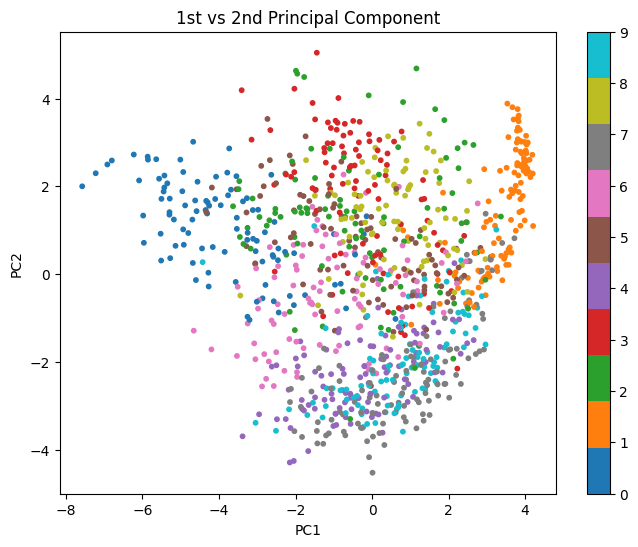

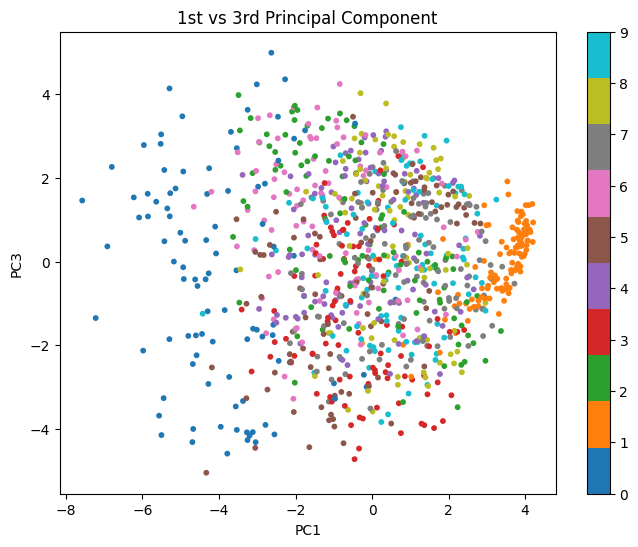

In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from keras.datasets import mnist

# this function computes the PCA of a dataset using Singular Value Decomposition (SVD)
def pca(X):
    # compute mean
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    
    # use SVD to compute the principal components
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    
    # Eigenvalues (weights) ve eigenvectors (vectors)
    weights = S**2 / (X.shape[0] - 1)
    vectors = Vt.T

    return mean, weights, vectors

# MNIST dataset load
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train[:1000].reshape(1000, -1) / 255.0
y_train = y_train[:1000]

# PCA computation
mean, weights, vectors = pca(x_train)
X_pca = (x_train - mean) @ vectors

# First two principal components visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab10', s=10)
plt.title("1st vs 2nd Principal Component")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

# 1. and 3. principal component visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=y_train, cmap='tab10', s=10)
plt.title("1st vs 3rd Principal Component")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.colorbar()
plt.show()


### Conclusions
- When the PCA algorithm is applied to the MNIST dataset, the high-dimensional data consisting of 784 pixels in each image is reduced to the principal components space. In the first step, the data is averaged and centered around this average. Then, all data is projected to these new components by using only the eigenvalues ​​(weights) and eigenvectors (component directions) obtained by using SVD (Singular Value Decomposition).

- According to the visualization results; when the data is distributed on the axis of the first two principal components (PC1 and PC2), it is observed that some number classes (especially 0, 1, 4, 7, 9) form distinct clusters. This shows that PCA highlights the components that make the class separation more meaningful. When the first and third components are examined together, although the separation between the classes is slightly weaker, it is seen that classes such as 1, 0 and 9 still show partial clustering.

- This analysis revealed that PCA is a powerful tool not only for dimensionality reduction but also for visualizing structural patterns in high-dimensional data. In particular, the variance carried by the first few principal components was effective in highlighting the differences between classes.

### Part 2 Code and Results

In [2]:
# This part of the code evaluates the performance of a Random Forest classifier on the PCA-reduced data 
for n_components in [10, 20, 50, 100]:
    X_reduced = X_pca[:, :n_components]
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(clf, X_reduced, y_train, cv=5)
    print(f"{n_components} components -> Mean Accuracy: {np.mean(scores):.4f}")

10 components -> Mean Accuracy: 0.8240
20 components -> Mean Accuracy: 0.8460
50 components -> Mean Accuracy: 0.8400
100 components -> Mean Accuracy: 0.8390


### Conclusions

- As a result of experiments conducted with Random Forest classifier on MNIST data with reduced dimensions with PCA, the following accuracy rates were obtained:

    - 10 components → 82.4% accuracy
    - 20 components → 84.6% accuracy (highest)
    - 50 components → 84.0% accuracy
    - 100 components → 83.9% accuracy

- These results show that PCA is an effective dimensionality reduction method. In particular, the 84.6% accuracy obtained with only 20 components proves that similar performance can be achieved with much fewer features than the original 784-dimensional data.

- A slight decrease in accuracy rates was observed with 50 and 100 components. This suggests that the information carried by PCA in its later components is less meaningful in terms of classification and may even add noise to the model. In addition, the fact that models working at low dimensions generally tend to overfit less supports this observation.

- As a result, reducing the data dimension with PCA both shortens the model training time and keeps the classification success at reasonable levels. When considered together with visualization, it becomes clear that PCA is a very useful preprocessing step in both analysis and modeling processes.